# Principl Component Analysis  
## Maximize projected covariance 
Given data $\{x_n\}$, the data covariance matrix is: 
$$S = \frac{1}{N}\sum_{n=1}^N (x_n -\bar{x}) (x_n -\bar{x}) ^T \ (12.3)$$

As we have already learned from Page 562, finding the first principal component is to identify the projection that maximizes the projected variance,  
$$u_1^T S u_1$$
 with respect to $u_1$ , where $u_1^Tu_1=1.$

## Relation to eigen decomposition 

 With a Lagrange multiplier $\lambda_1$, the above problem is equivalent to maximizing: 
 $$u_1^T S u_1 + \lambda_1(1-u_1^Tu_1)  \ (12.4)$$
 
By finding  the derivative with respect to $u_1$, the stationary point that maximizes the above  requires
$$Su_1 = \lambda_1 u_1 \ (12.5)$$
which is equivalent to finding the largest eigenvalue $\lambda_1$. 

Similarly, the second principal component is to identify the projection that maxiimizes the residual variance, 
$$u_2^T (S-u_1u_1^T S )u_2$$
 with respect to  $u_2$, 
 wihch is equivalent to finding the second largest eigenvalue $\lambda_2$. 

##  Using Eigen Decomposition to solve PCA
Using Singular value decomposition (SVD) to calculate eigen vector and eigen values 


### Eigen Decomposition:


For a covariance matrix $ C  $, the eigen decomposition is given by:

$$
C = U \Lambda V^T
$$

where:
- $ C $ is a square symmetric $ n \times n $ matrix.
- $ V $ is a matrix whose columns are the eigenvectors $v_i $ of $ A $.
- $U = V$
- $\Lambda $ is a diagonal matrix, with each diagonal element $ \lambda_i $ being an eigenvalue of $A$.

### Singular Value Decomposition (SVD):

SVD decomposes a matrix $ X$ as:

$$
X = U \Sigma V^T
$$

where:
- $ X $ is an $ m \times n $ matrix.
- $U $ is an $ m \times m $ unitary  matrix, with $ U^T U = I $.
- $ \Sigma $ is an $ m \times n $ rectangular diagonal matrix, with non-negative diagonal elements called singular values.
- $ V $ is an $ n \times n $ unitary  matrix, with $ V^T V = I $.

### Relation Between SVD and Eigen Decomposition for solving PCA

The covariance matrix is given by $C = \frac{X^TX}{n-1}$, therefore

$$
\frac{X^TX}{n-1} = \frac{V \Sigma U^TU \Sigma V^T}{n-1}
=V\frac{ \Sigma^2 }{n-1} V^T $$

$$\therefore \frac{ \Sigma^2 }{n-1} = \Lambda$$

##  Projection along the direction of Principle components 
The projection is given by 
$$X_\text{transform} = X u_i$$

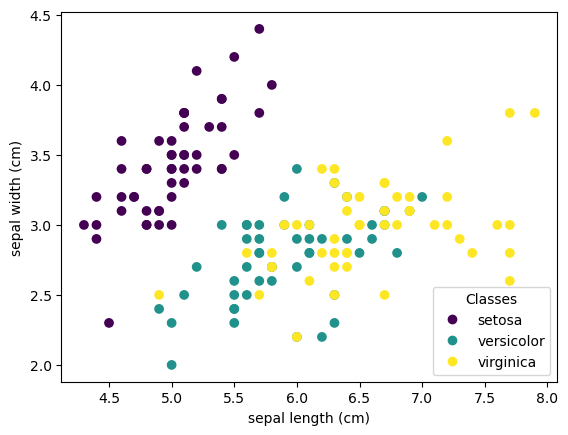

In [1]:
# Load data 
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data

fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")
plt.show()

In [23]:

import numpy as np

class PCA:
    
    def __init__(self, num_components,solver ='cov_eigen'):
        self.num_components = num_components
        self.solver = solver
    
    
    def fit(self, X):
        """
        Find principal components
        """
        n_samples, n_features = X.shape 
        # data preprocessing
        x_mean = X.mean(axis = 0)
        self.mean = x_mean
        X_centered = X-x_mean
        
        
        
        if self.solver =='cov_eigen':

            ################### BEGIN CODE #############################
            
            # Use eigen decomposition of covatriance matrix
            
         
            # calculate covaraince matrix
            # cov_matrix = 

            #  use eigen decomposition function from numpy (np.linalg.eig)
            # eigen_values, eigen_vectors = 


            # sort eigenvalues and vectors by ranking of eigen_values
            # sort_idx = 
            # eigen_values_sort   = 
            # eigen_vectors_sort  = 
            
            
            # find principle components and explained varaince 
            
         
            # self.principle_components = 
            # self.explained_variance = 
            #################### END CODE ##############################    
 
          
            

        elif self.solver =='svd':

             ################### BEGIN CODE #############################
            
            # Use singular value decomposition of data matrix X (use np.linalg.svd)

            # U, S, Vt = 
            # self.principle_components =  
            # self.explained_variance =  
            #################### END CODE ##############################    
            


        
        
    def transform(self, X):
        """
        Transform data
        """
        
        ################### BEGIN CODE #############################
            
        # Project original X to the direction of principle components

        # X_transform=   
        #################### END CODE ##############################    
            
        return X_transform

In [39]:
def plot_X_transform(X_transform, classes, labels   ):
    fig, ax = plt.subplots()

    scatter = ax.scatter(
                X_transform[:, 0],
                X_transform[:, 1],
                c=classes,
                s=40,
            )

    ax.set_title("First two PCA dimensions")
    ax.set_xlabel("1st Eigenvector")
    ax.xaxis.set_ticklabels([])
    ax.set_ylabel("2nd Eigenvector")
    ax.yaxis.set_ticklabels([])
    ax.legend(scatter.legend_elements()[0], labels, loc="lower right", title="Classes")
    plt.show()

def plot_explained_variance_ratio(explained_variance,n_components):
    fig, ax = plt.subplots()
    ax.plot(explained_variance/explained_variance.sum(),'.-b')
    ax.set_xlabel('Principle Components')
    ax.set_ylabel('Explained variance ratio')
    ax.set_title('Explained variance ratio')
    ax.set_xticks(np.arange(0, n_components))
    ax.set_xticklabels(1+np.arange(0, n_components))
    plt.show()


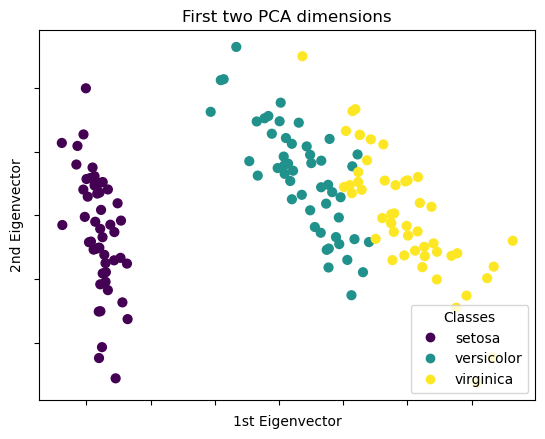

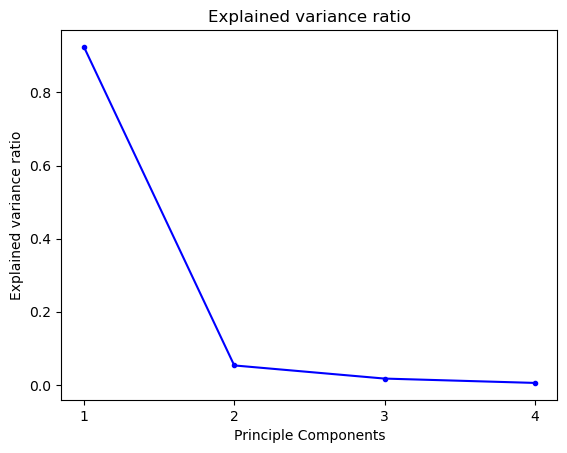

In [40]:
pca = PCA(num_components = 4, solver ='svd')
pca.fit(X)
X_transform = pca.transform(X)


plot_X_transform(X_transform, classes = iris.target, labels = iris.target_names)
plot_explained_variance_ratio(pca.explained_variance,n_components=4)

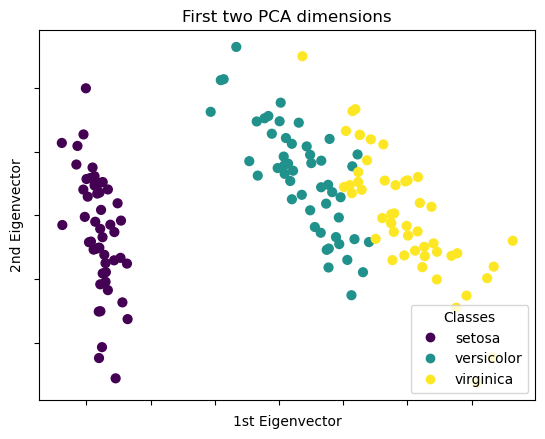

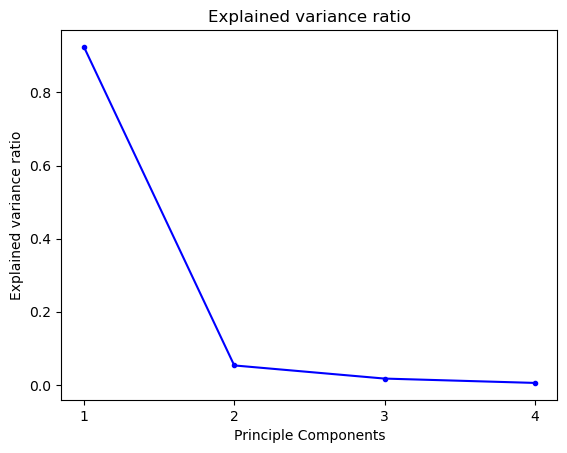

In [41]:
pca = PCA(num_components = 2, solver ='cov_eigen')
pca.fit(X)
X_transform = pca.transform(X)


plot_X_transform(X_transform, classes = iris.target, labels = iris.target_names)
plot_explained_variance_ratio(pca.explained_variance,n_components=4)